# Unidad 4: Experimentos aleatorizados de un solo factor

## 1. Prueba para datos paramétricos con grupos independientes

### Ejemplo:

In [4]:
resistencia <- c(15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85,
                 16.35, 17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73,
                 13.02, 12.05, 12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82,
                 12.49, 13.55, 14.53)
templado <- c(rep(c("rapido", "lento"), c(15,15)))
grosor <- rep(c(8, 16, 24), each = 5, times = 2)
datos <- data.frame(templado = templado, grosor = as.factor(grosor),
                    resistencia = resistencia)
#datos

In [7]:
#install.packages("ggplot2")
#install.packages("gridExtra")
#install.packages("lsr")
#install.packages("tidyr")
install.packages("car")

Warning message:
“dependency ‘foreign’ is not available”
also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘maptools’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘maptools’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



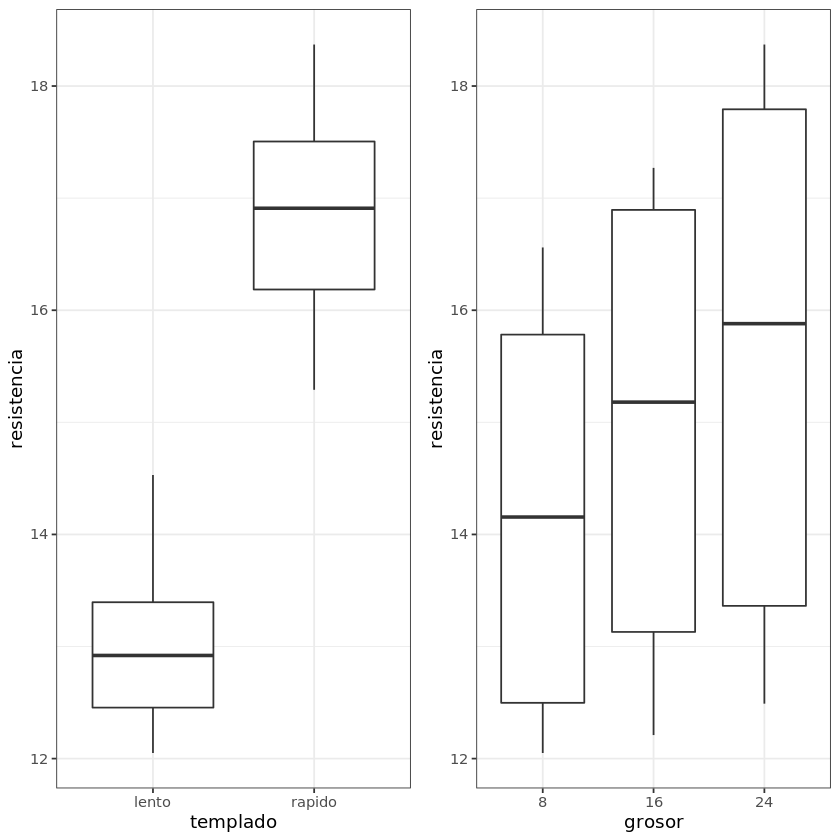

In [13]:
#library("ggplot2")
#library("gridExtra")
p1 <- ggplot(data = datos, aes(x = templado, y = resistencia)) + 
      geom_boxplot() + theme_bw()
p2 <- ggplot(data = datos, aes(x = grosor, y = resistencia)) +
      geom_boxplot() + theme_bw()
p3 <- ggplot(data = datos, aes(x = templado, y = resistencia, colour = grosor)) +
      geom_boxplot() + theme_bw()
grid.arrange(p1, p2, ncol = 2)

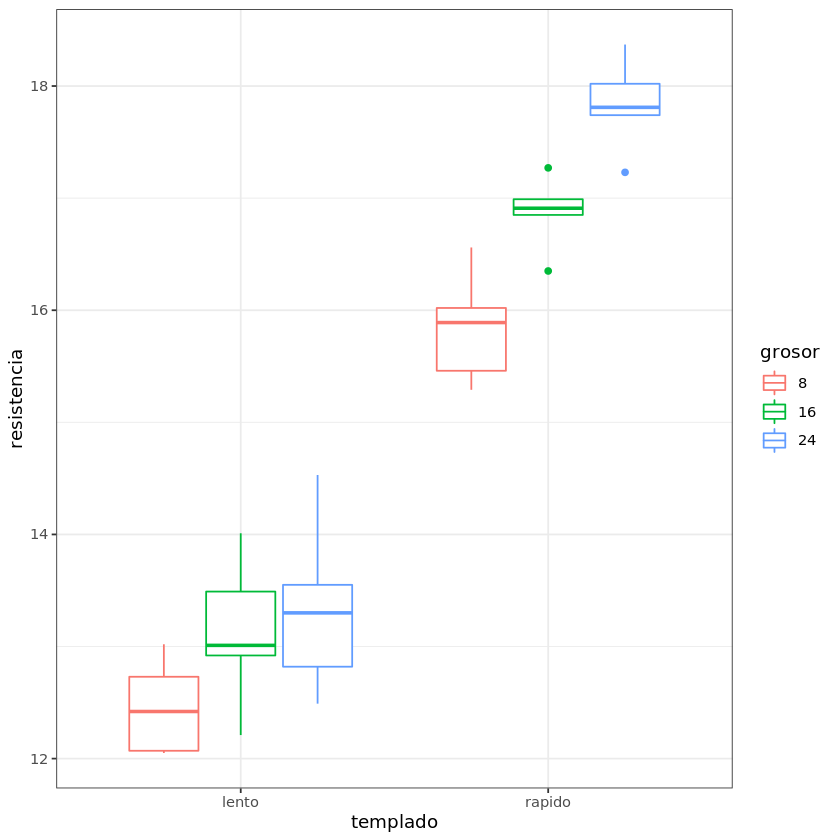

In [14]:
p3

In [15]:
with(data = datos, expr = tapply(resistencia, templado, mean))
with(data = datos, expr = tapply(resistencia, templado, sd))
with(data = datos, expr = tapply(resistencia, grosor, mean))
with(data = datos, expr = tapply(resistencia, grosor, sd))

lento   rapido 
12.97467 16.85067

lento    rapido 
0.7113455 0.9276427

8     16     24 
14.151 15.001 15.586

8       16       24 
1.836993 2.036797 2.442354

In [16]:
with(data = datos,expr = tapply(resistencia, list(templado,grosor), mean))
with(data = datos,expr = tapply(resistencia, list(templado,grosor), sd))

,8,16,24
lento,12.458,13.128,13.338
rapido,15.844,16.874,17.834


,8,16,24
lento,0.4207969,0.6724730,0.7833709
rapido,0.5000300,0.3341856,0.4171690


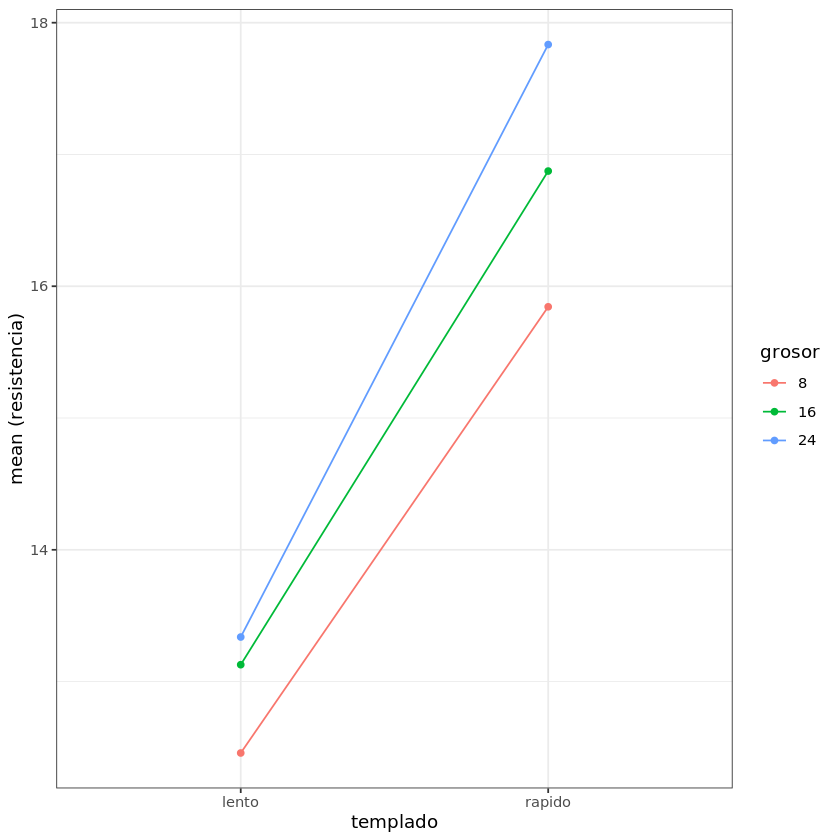

In [17]:
ggplot(data = datos, aes(x = templado, y = resistencia, colour = grosor, group = grosor)) +
    stat_summary(fun = mean, geom = "point") +
    stat_summary(fun = mean, geom = "line") +
    labs(y  =  'mean (resistencia)') + 
    theme_bw()

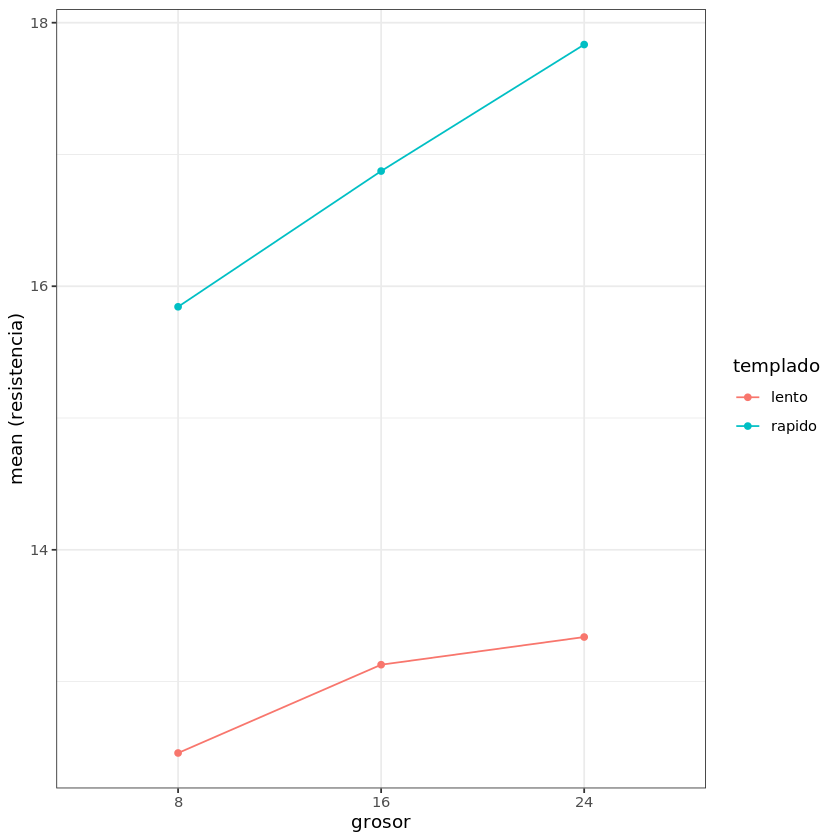

In [18]:
ggplot(data = datos, aes(x = grosor, y = resistencia, colour = templado, group = templado)) +
    stat_summary(fun = mean, geom = "point") +
    stat_summary(fun = mean, geom = "line") +
    labs(y  =  'mean (resistencia)') + 
    theme_bw()

ANOVA

In [19]:
anova <- aov(resistencia ~ templado * grosor, data = datos)
summary(anova)

                Df Sum Sq Mean Sq F value   Pr(>F)    
templado         1 112.68  112.68 380.082 3.19e-16 ***
grosor           2  10.41    5.21  17.563 2.00e-05 ***
templado:grosor  2   1.60    0.80   2.705   0.0873 .  
Residuals       24   7.11    0.30                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [23]:
library(lsr)
etaSquared(anova)

,eta.sq,eta.sq.part
templado,0.85485219,0.9406061
grosor,0.07900327,0.5940887
templado:grosor,0.01216553,0.1839235


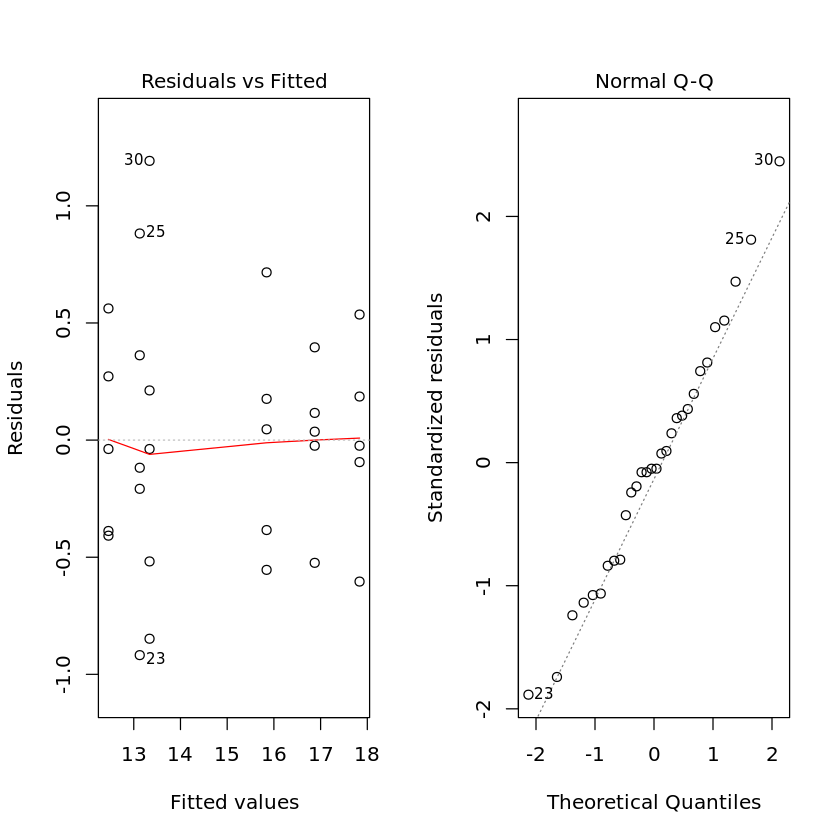

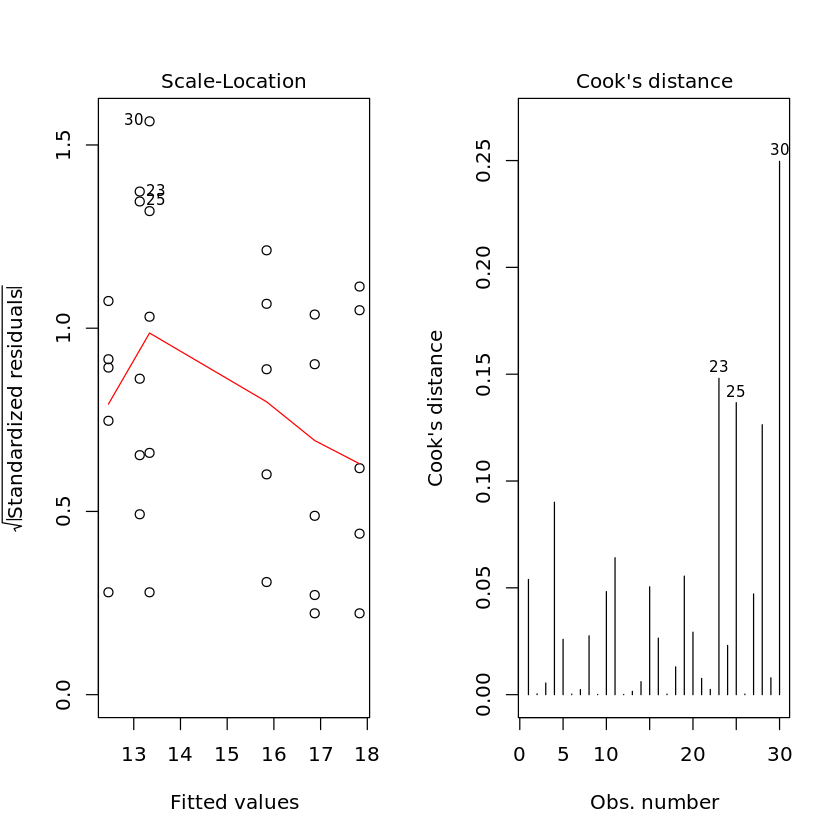

In [24]:
par(mfrow = c(1,2))
plot(anova, which = 1:4)

## 2. Prueba para datos paramétricos con grupos relacionados (pareados)

### Ejemplo:

In [6]:
#require(tidyr)
elemento <- c("lettuce", "potatoes", "milk", "eggs", "bread", "cereal", "ground.beef",
              "tomato.soup", "laundry.detergent", "aspirin")
tienda_A <- c(1.75, 2.65, 2.23, 0.97, 2.37, 4.69, 3.13, 0.93, 8.23, 6.69)
tienda_B <- c(1.78, 1.98, 1.69, 0.99, 1.70, 3.15, 1.88, 0.65, 5.99, 4.84)
tienda_C <- c(1.29, 1.99, 1.79, 0.69, 1.89, 2.99, 2.09, 0.65, 5.99, 4.99)
tienda_D <- c(1.29, 1.99, 1.59, 1.09, 1.89, 3.09, 2.49, 0.69, 6.99, 5.15)
datos <- data.frame(elemento, tienda_A, tienda_B, tienda_C, tienda_D)
datos_tabla <- gather(data = datos, key = "tienda", value = "precio", 2:5)
#datos_tabla

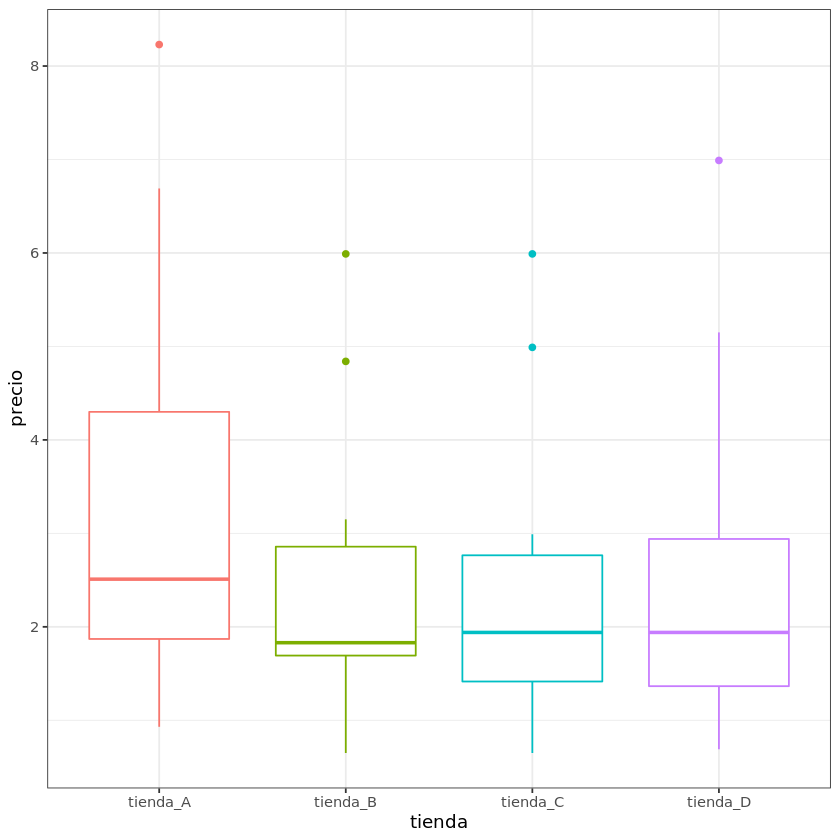

In [7]:
library("ggplot2")
ggplot(data = datos_tabla, aes(x = tienda, y = precio, colour = tienda)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

In [8]:
with(data = datos_tabla, expr = tapply(precio, tienda, mean))
with(data = datos_tabla, expr = tapply(precio, tienda, sd))

tienda_A tienda_B tienda_C tienda_D 
   3.364    2.465    2.436    2.626

tienda_A tienda_B tienda_C tienda_D 
2.440347 1.707430 1.765296 1.987758

ANOVA

In [8]:
library("car")
datos <- as.matrix(datos[-1])
modelo_lm <- lm(datos ~ 1)
tienda <- factor(c("tienda_A", "tienda_B", "tienda_C", "tienda_D"))
anova_pareado <- Anova(modelo_lm, idata = data.frame(tienda),
                       idesign = ~ tienda, type = "III")
summary(anova_pareado, multivariate = F)

ERROR: Error in library("car"): there is no package called ‘car’


In [9]:
pairwise.t.test(x = datos_tabla$precio, g = datos_tabla$tienda,
                p.adjust.method = "holm", paired = TRUE, alternative = "two.sided")

ERROR: Error in factor(g): object 'datos_tabla' not found


## 3. Prueba para datos no paramétricos con grupos independientes

### Ejemplo:

In [10]:
datos <- data.frame(
  condicion = c(rep("condicion1", 18), rep("condicion2", 18), rep("condicion3", 18)),
  n_huevos = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 27, 28, 29, 30, 51, 52, 53, 342, 40,
               41, 42, 43, 44, 45, 46, 47, 48, 67, 88, 89, 90, 91,92, 93, 94, 293,
               19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 25, 36, 37, 58, 59, 60, 71, 72)
  )
aggregate(n_huevos ~ condicion, data = datos, FUN = median)
aggregate(n_huevos ~ condicion, data = datos, FUN = sd)

condicion,n_huevos
<fct>,<dbl>
condicion1,12.5
condicion2,57.5
condicion3,26.5


condicion,n_huevos
<fct>,<dbl>
condicion1,78.10637
condicion2,58.41750
condicion3,18.59097


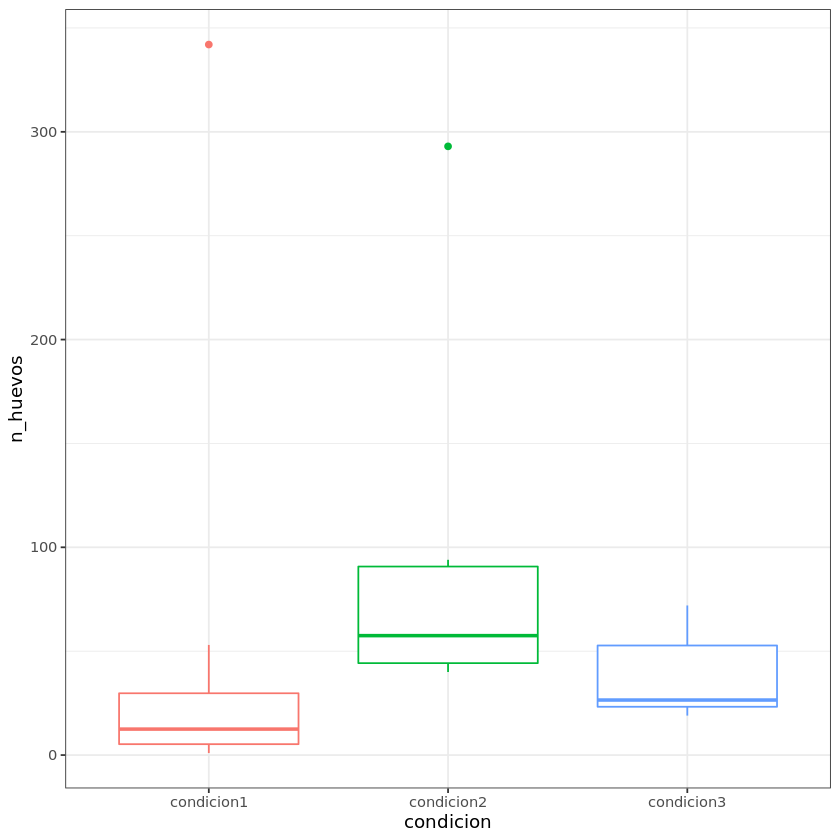

In [12]:
#library("ggplot2")
ggplot(data = datos, mapping = aes(x = condicion, y = n_huevos, colour = condicion)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



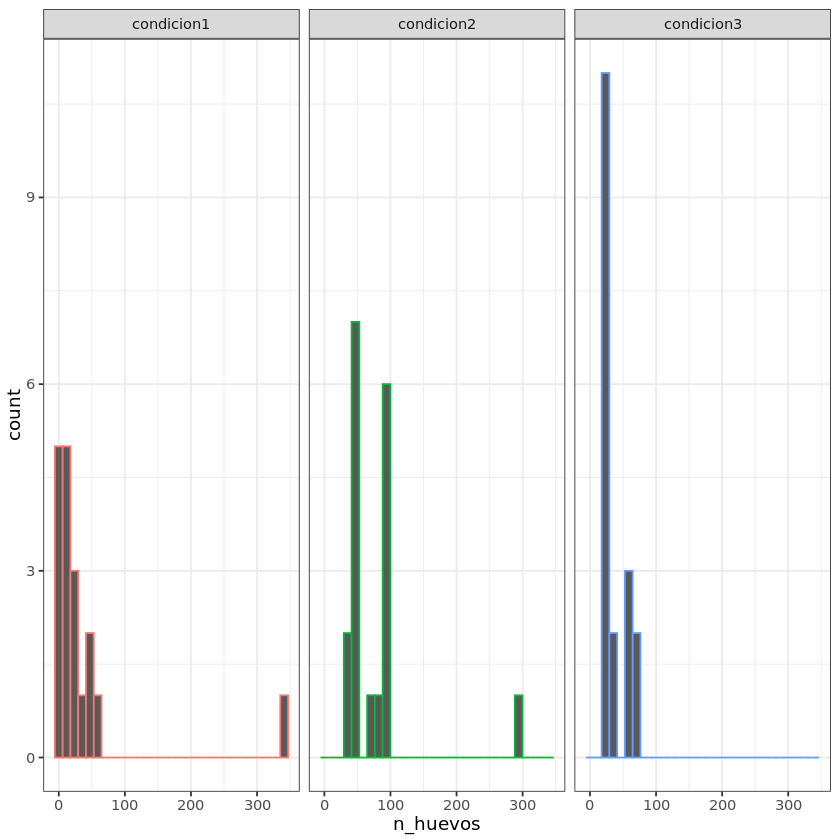

In [13]:
ggplot(data = datos, mapping = aes(x = n_huevos, colour = condicion)) +
geom_histogram() +
theme_bw() +
facet_grid(. ~ condicion) +
theme(legend.position = "none")

Kruskall - wallis

In [14]:
kruskal.test(n_huevos ~ condicion, data = datos)


	Kruskal-Wallis rank sum test

data:  n_huevos by condicion
Kruskal-Wallis chi-squared = 19.964, df = 2, p-value = 4.623e-05


In [15]:
pairwise.wilcox.test(x=datos$n_huevos, g=datos$condicion, p.adjust.method="holm" )

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  datos$n_huevos and datos$condicion 

           condicion1 condicion2
condicion2 0.00029    -         
condicion3 0.04795    0.00058   

P value adjustment method: holm 

## 4. Prueba para datos no paramétricos con grupos relacionados (pareados)

### Ejemplo

In [17]:
valoracion <- c( 9, 5, 2, 6, 3, 1, 5, 5, 5, 11, 5, 1, 8, 4, 3, 10, 4, 1, 7, 3, 4 )
hora <- factor( rep( c( "mañana", "tarde", "noche" ), 7 ) )
sujeto <- factor( rep( 1:7, each = 3 ) )
datos <- data.frame( valoracion, hora, sujeto )
by(data = datos$valoracion, INDICES = datos$hora, FUN = median)

datos$hora: mañana
[1] 8
------------------------------------------------------------ 
datos$hora: noche
[1] 2
------------------------------------------------------------ 
datos$hora: tarde
[1] 4

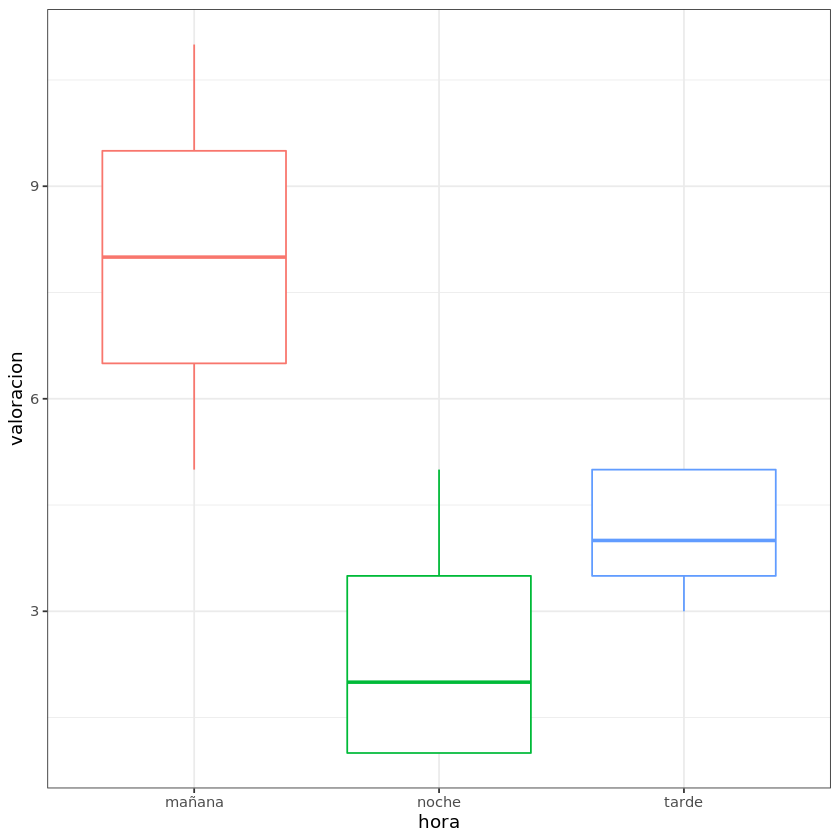

In [18]:
ggplot(data = datos, mapping = aes(x = hora, y = valoracion, colour = hora)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

In [20]:
friedman.test(valoracion, hora, sujeto)


	Friedman rank sum test

data:  valoracion, hora and sujeto
Friedman chi-squared = 10.333, df = 2, p-value = 0.005704


In [22]:
pairwise.wilcox.test(datos$valoracion, datos$hora, paired=TRUE, p.adjust.method="holm")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”



	Pairwise comparisons using Wilcoxon signed rank test 

data:  datos$valoracion and datos$hora 

      mañana noche
noche 0.1    -    
tarde 0.1    0.1  

P value adjustment method: holm 